In [249]:
import matplotlib.pyplot as plt
import numpy as np
import csv
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import MinMaxScaler
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
%matplotlib ipympl

In [250]:
input_size = 3
hidden_size = 32
output_size = 3
num_epochs = 200
num_layers = 2
learning_rate = 0.001 
dropout = 0.2

In [251]:
TEST_RESULT = '../../test_results/'
TARGET_CTRL_PRES = './control_presets'

track_name_1 = 'quadrilateral_lower'
track_name_2 = 'quadrilateral_middle'
track_name_3 = 'triangle_lower'
track_name_4 = 'triangle_middle'
Track_name_1 = 'Quadrilateral Lower'
Track_name_2 = 'Quadrilateral Middle'
Track_name_3 = 'Triangle Lower'
Track_name_4 = 'Triangle Middle'

In [252]:
DELAY_REAL_FILE = [['nodelay1', 'nodelay2', 'nodelay3'], ['1sdelay0', '1sdelay1_2', '1sdelay2'], ['2sdelay0_3', '2sdelay1_2', '2sdelay2_2']]
STEP_REAL_FILE = [['1sdelay0', '1sdelay1_2', '1sdelay2'], ['smallstep0', 'smallstep1_3', 'smallstep2_7'], ['largestep0', 'largestep1', 'largestep2']]
FINAL_REAL_FILE = [['q_lower_round0', 'q_lower_round1', 'q_lower_round2', 'q_lower_round3'], ['q_middle_round0', 'q_middle_round1', 'q_middle_round2', 'q_middle_round3'], ['t_lower_round0', 't_lower_round1', 't_lower_round2', 't_lower_r_round3'], ['t_middle_round0', 't_middle_round1', 't_middle_round2', 't_middle_round3'], ['p_round0', 'p_round1', 'p_round2', 'p_round3']]
D50_REAL_FILE = [['50d_q_round0', '50d_q_round1', '50d_q_round2', '50d_q_round3'], ['50d_t_round0', '50d_t_round1', '50d_t_round2', '50d_t_round3']]
FINAL_REVERSE_REAL_FILE = [['q_lower_r_round0', 'q_lower_r_round1', 'q_lower_r_round2', 'q_lower_r_round3'], ['q_middle_r_round0', 'q_middle_r_round1', 'q_middle_r_round2', 'q_middle_r_round3'], ['t_lower_r_round0', 't_lower_r_round1', 't_lower_r_round2', 't_lower_r_round3'], ['t_middle_r_round0', 't_middle_r_round1', 't_middle_r_round2', 't_middle_r_round3']]

Different Delay Time

In [253]:
# read data of different delay
RealDataDelay = []
TargetDataDelay = []
DELAY_MODEL = [['nodelay1', 'nodelay2', 'nodelay3'], ['1sdelay0', '1sdelay1', '1sdelay2'],['2sdelay0', '2sdelay1', '2sdelay2']]

for i in range(3):
    # create an empty list to hold the sequences
    RealData = []
    TargetData = []

    for j in range(3):
        real_file = TEST_RESULT + '/' + DELAY_REAL_FILE[i][j] +'.csv'
        target_file = TARGET_CTRL_PRES + '/LSTM_' + str(track_name_1) + '_' + DELAY_MODEL[i][j] +'_'+str(learning_rate)+'_'+str(hidden_size)+'_'+str(num_epochs)+'_'+str(num_layers)+'_' +str(dropout)+'.csv'

        # create an empty list to hold the sequences
        real_data = []
        target_data = []

        # read the CSV file and split it into sequences
        with open(real_file, newline='') as f:
            reader = csv.reader(f)
            for row in reader:
                if row[0] == '':  # empty row indicates end of sequence
                    continue
                else:
                    # convert the row to a list of floats and append to the sequence
                    row_float = [float(x) for x in row]
                    real_data.append(row_float)

        with open(target_file, newline='') as f:
            reader = csv.reader(f)
            for row in reader:
                if row[0] == '':  # empty row indicates end of sequence
                    continue
                else:
                    # convert the row to a list of floats and append to the sequence
                    row_float = [float(x) for x in row]
                    target_data.append(row_float) 

        # append the sequence to the list of all sequences
        RealData.append(real_data)
        TargetData.append(target_data)
    
    RealDataDelay.append(RealData)
    TargetDataDelay.append(TargetData)

print('real data size:', len(RealDataDelay), 'x', len(RealDataDelay[0]), 'x', len(RealDataDelay[0][0]), 'x', len(RealDataDelay[0][0][0]))
print('target data size:', len(TargetDataDelay), 'x', len(TargetDataDelay[0]), 'x', len(TargetDataDelay[0][0]), 'x', len(TargetDataDelay[0][0][0]))

real data size: 3 x 3 x 80 x 6
target data size: 3 x 3 x 80 x 6


In [254]:
# calculate the RMSEs
RMSEs = []
for i in range(len(TargetDataDelay)):
    rmses = []
    for j in range(len(TargetDataDelay[i])):
        rmse = 0
        for k in range(len(TargetDataDelay[i][j])):
            rmse += (np.linalg.norm(np.array(TargetDataDelay[i][j][k][3:6]) - np.array(RealDataDelay[i][j][k][3:6])))**2
        rmse /= len(TargetDataDelay[i][j])
        rmse = np.sqrt(rmse)
        rmses.append(rmse)
    RMSEs.append(rmses)

# Print the RMSEs matrix as several rows
print('RMSEs:')
for row in RMSEs:
    print(row)

RMSEs:
[34.019415639656316, 21.544531069763654, 25.11880112770955]
[29.17578324461715, 22.670743816825173, 18.000723163942315]
[32.56393852330576, 27.673192282173392, 22.464072221825177]


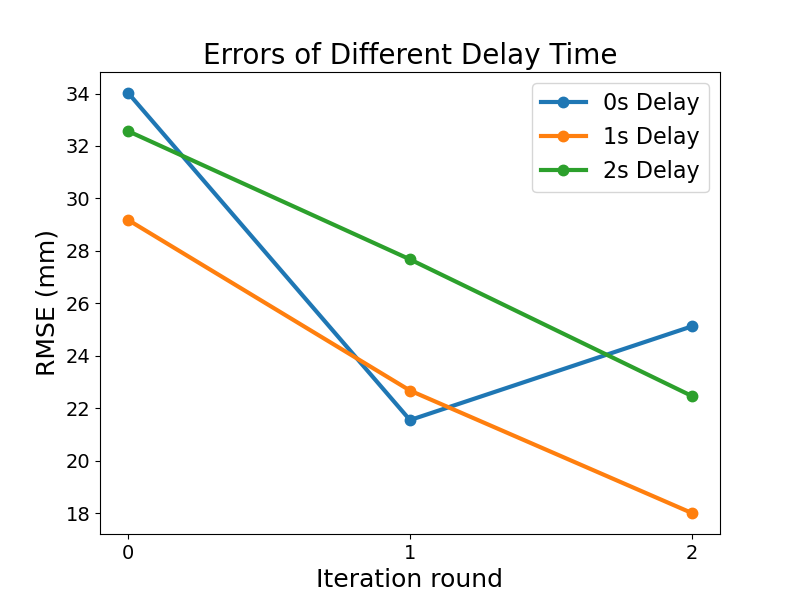

In [255]:
# plot the RMSEs
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111)
ax.plot([0, 1, 2], RMSEs[0], marker='.', markersize=15, linewidth=3, label='0s Delay')
ax.plot([0, 1, 2], RMSEs[1], marker='.', markersize=15, linewidth=3, label='1s Delay')
ax.plot([0, 1, 2], RMSEs[2], marker='.', markersize=15, linewidth=3, label='2s Delay')
ax.set_xlabel('Iteration round', fontsize=18)
ax.set_ylabel('RMSE (mm)',  fontsize=18)
ax.set_title('Errors of Different Delay Time', fontsize=20)
ax.legend(fontsize=16)
ax.set_xticks([0, 1, 2])
plt.tick_params(labelsize=14)
plt.show()


Different Step Sizes

In [256]:
# read data of different step
RealDataStep = []
TargetDataStep = []
STEP_MODEL = [['1sdelay0', '1sdelay1', '1sdelay2'], ['smallstep0', 'smallstep1', 'smallstep2'], ['largestep0', 'largestep1', 'largestep2']]

for i in range(3):
    # create an empty list to hold the sequences
    RealData = []
    TargetData = []

    for j in range(3):
        real_file = TEST_RESULT + '/' + STEP_REAL_FILE[i][j] +'.csv'
        target_file = TARGET_CTRL_PRES + '/LSTM_' + str(track_name_1) + '_' + STEP_MODEL[i][j] +'_'+str(learning_rate)+'_'+str(hidden_size)+'_'+str(num_epochs)+'_'+str(num_layers)+'_' +str(dropout)+'.csv'

        # create an empty list to hold the sequences
        real_data = []
        target_data = []

        # read the CSV file and split it into sequences
        with open(real_file, newline='') as f:
            reader = csv.reader(f)
            for row in reader:
                if row[0] == '':  # empty row indicates end of sequence
                    continue
                else:
                    # convert the row to a list of floats and append to the sequence
                    row_float = [float(x) for x in row]
                    real_data.append(row_float)

        with open(target_file, newline='') as f:
            reader = csv.reader(f)
            for row in reader:
                if row[0] == '':  # empty row indicates end of sequence
                    continue
                else:
                    # convert the row to a list of floats and append to the sequence
                    row_float = [float(x) for x in row]
                    target_data.append(row_float) 

        # append the sequence to the list of all sequences
        RealData.append(real_data)
        TargetData.append(target_data)
    
    RealDataStep.append(RealData)
    TargetDataStep.append(TargetData)

print('real data size:', len(RealDataStep), 'x', len(RealDataStep[0]), 'x', len(RealDataStep[0][0]), 'x', len(RealDataStep[0][0][0]))
print('target data size:', len(TargetDataStep), 'x', len(TargetDataStep[0]), 'x', len(TargetDataStep[0][0]), 'x', len(TargetDataStep[0][0][0]))

real data size: 3 x 3 x 60 x 6
target data size: 3 x 3 x 60 x 6


In [257]:
# calculate the RMSEs
RMSEs = []
for i in range(len(TargetDataStep)):
    rmses = []
    for j in range(len(TargetDataStep[i])):
        rmse = 0
        for k in range(len(TargetDataStep[i][j])):
            rmse += (np.linalg.norm(np.array(TargetDataStep[i][j][k][3:6]) - np.array(RealDataStep[i][j][k][3:6])))**2
        rmse /= len(TargetDataStep[i][j])
        rmse = np.sqrt(rmse)
        rmses.append(rmse)
    RMSEs.append(rmses)

# Print the RMSEs matrix as several rows
print('RMSEs:')
for row in RMSEs:
    print(row)

RMSEs:
[29.17578324461715, 22.670743816825173, 18.000723163942315]
[41.93273088636838, 25.41779386514567, 21.44861637563957]
[52.31928329096236, 23.047380353396974, 21.404174793309803]


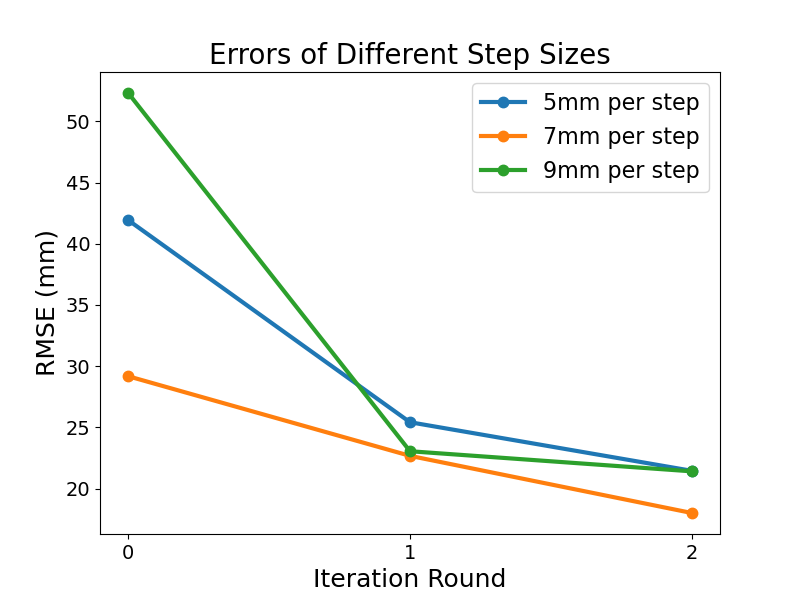

In [258]:
# plot the RMSEs
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111)
ax.plot([0, 1, 2], RMSEs[1], marker='.', markersize=15, linewidth=3, label='5mm per step')
ax.plot([0, 1, 2], RMSEs[0], marker='.', markersize=15, linewidth=3, label='7mm per step')
ax.plot([0, 1, 2], RMSEs[2], marker='.', markersize=15, linewidth=3, label='9mm per step')
ax.set_xlabel('Iteration Round', fontsize=18)
ax.set_ylabel('RMSE (mm)', fontsize=18)
ax.set_title('Errors of Different Step Sizes', fontsize=20)
ax.legend(fontsize=16)
ax.set_xticks([0, 1, 2])
plt.tick_params(labelsize=14)
plt.show()


Different Epochs

In [259]:
# read data of different epochs
RealDataEpoch = []
TargetDataEpoch = []
EPOCH_MODEL = [['round0_100', 'round1_100', 'round2_100', 'round3_100'], ['round0_200', 'round1_200', 'round2_200', 'round3_200_2'], ['round0_300', 'round1_300', 'round2_300', 'round3_300']]
epochs = [100, 200, 300]

for i in range(3):
    # create an empty list to hold the sequences
    RealData = []
    TargetData = []
    epoch = epochs[i]

    for j in range(3):
        real_file = TEST_RESULT + '/' + EPOCH_MODEL[i][j+1] +'.csv'
        target_file = TARGET_CTRL_PRES + '/LSTM_' + str(track_name_1) + '_' + EPOCH_MODEL[i][j] +'_'+str(learning_rate)+'_'+str(hidden_size)+'_'+str(epoch)+'_'+str(num_layers)+'_' +str(dropout)+'.csv'

        # create an empty list to hold the sequences
        real_data = []
        target_data = []

        # read the CSV file and split it into sequences
        with open(real_file, newline='') as f:
            reader = csv.reader(f)
            for row in reader:
                if row[0] == '':  # empty row indicates end of sequence
                    continue
                else:
                    # convert the row to a list of floats and append to the sequence
                    row_float = [float(x) for x in row]
                    real_data.append(row_float)

        with open(target_file, newline='') as f:
            reader = csv.reader(f)
            for row in reader:
                if row[0] == '':  # empty row indicates end of sequence
                    continue
                else:
                    # convert the row to a list of floats and append to the sequence
                    row_float = [float(x) for x in row]
                    target_data.append(row_float) 

        # append the sequence to the list of all sequences
        RealData.append(real_data)
        TargetData.append(target_data)
    
    RealDataEpoch.append(RealData)
    TargetDataEpoch.append(TargetData)

print('real data size:', len(RealDataEpoch), 'x', len(RealDataEpoch[0]), 'x', len(RealDataEpoch[0][0]), 'x', len(RealDataEpoch[0][0][0]))
print('target data size:', len(TargetDataEpoch), 'x', len(TargetDataEpoch[0]), 'x', len(TargetDataEpoch[0][0]), 'x', len(TargetDataEpoch[0][0][0]))

real data size: 3 x 3 x 56 x 6
target data size: 3 x 3 x 56 x 6


In [260]:
# calculate the RMSEs
RMSEs = []
for i in range(len(TargetDataEpoch)):
    rmses = []
    for j in range(len(TargetDataEpoch[i])):
        rmse = 0
        for k in range(len(TargetDataEpoch[i][j])):
            rmse += (np.linalg.norm(np.array(TargetDataEpoch[i][j][k][3:6]) - np.array(RealDataEpoch[i][j][k][3:6])))**2
        rmse /= len(TargetDataEpoch[i][j])
        rmse = np.sqrt(rmse)
        rmses.append(rmse)
    RMSEs.append(rmses)

# Print the RMSEs matrix as several rows
print('RMSEs:')
for row in RMSEs:
    print(row)

RMSEs:
[42.73711937129577, 33.78180666380052, 30.195460622510947]
[30.3067292216199, 20.481577191624137, 18.205859335495237]
[34.7578364060938, 38.46417571223827, 34.95368087301644]


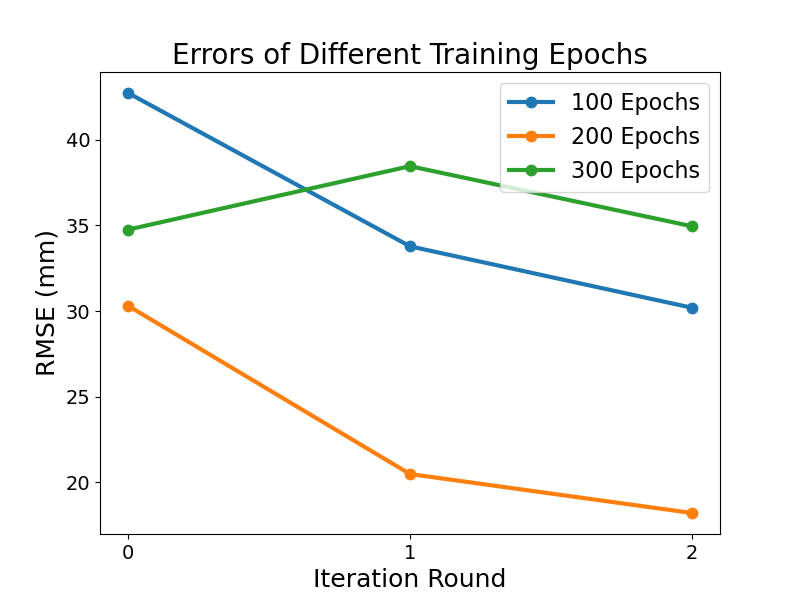

In [261]:
# plot the RMSEs
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111)
ax.plot([0, 1, 2], RMSEs[0], marker='.', markersize=15, linewidth=3, label='100 Epochs')
ax.plot([0, 1, 2], RMSEs[1], marker='.', markersize=15, linewidth=3, label='200 Epochs')
ax.plot([0, 1, 2], RMSEs[2], marker='.', markersize=15, linewidth=3, label='300 Epochs')
ax.set_xlabel('Iteration Round', fontsize=18)
ax.set_ylabel('RMSE (mm)', fontsize=18)
ax.set_title('Errors of Different Training Epochs', fontsize=20)
ax.legend(fontsize=16)
ax.set_xticks([0, 1, 2])
plt.tick_params(labelsize=14)
plt.show()

Final Results

In [262]:
# read final data 
RealDataFinal = []
TargetDataFinal = []
FINAL_MODEL = [['quadrilateral_lower_round0', 'quadrilateral_lower_round1', 'quadrilateral_lower_round2', 'quadrilateral_lower_round3'], ['quadrilateral_middle_round0', 'quadrilateral_middle_round1', 'quadrilateral_middle_round2', 'quadrilateral_middle_round3'], ['triangle_lower_round0', 'triangle_lower_round1', 'triangle_lower_round2', 'triangle_lower_reverse_round3'], ['triangle_middle_round0', 'triangle_middle_round1', 'triangle_middle_round2', 'triangle_middle_round3'], ['pentagon_round0', 'pentagon_round1', 'pentagon_round2', 'pentagon_round3']]

for i in range(5):
    # create an empty list to hold the sequences
    RealData = []
    TargetData = []

    for j in range(4):
        real_file = TEST_RESULT + '/' + FINAL_REAL_FILE[i][j] +'.csv'
        target_file = TARGET_CTRL_PRES + '/LSTM_' + FINAL_MODEL[i][j] +'_'+str(learning_rate)+'_'+str(hidden_size)+'_'+str(num_epochs)+'_'+str(num_layers)+'_' +str(dropout)+'.csv'

        # create an empty list to hold the sequences
        real_data = []
        target_data = []

        # read the CSV file and split it into sequences
        with open(real_file, newline='') as f:
            reader = csv.reader(f)
            for row in reader:
                if row[0] == '':  # empty row indicates end of sequence
                    continue
                else:
                    # convert the row to a list of floats and append to the sequence
                    row_float = [float(x) for x in row]
                    real_data.append(row_float)

        with open(target_file, newline='') as f:
            reader = csv.reader(f)
            for row in reader:
                if row[0] == '':  # empty row indicates end of sequence
                    continue
                else:
                    # convert the row to a list of floats and append to the sequence
                    row_float = [float(x) for x in row]
                    target_data.append(row_float) 

        # append the sequence to the list of all sequences
        RealData.append(real_data)
        TargetData.append(target_data)
    
    RealDataFinal.append(RealData)
    TargetDataFinal.append(TargetData)

# print('real data size:', len(RealDataFinal), 'x', len(RealDataFinal[0]), 'x', len(RealDataFinal[0][0]), 'x', len(RealDataFinal[0][0][0]))
# print('target data size:', len(TargetDataFinal), 'x', len(TargetDataFinal[0]), 'x', len(TargetDataFinal[0][0]), 'x', len(TargetDataFinal[0][0][0]))

# print all the sizes of the data
# for i in range(len(TargetDataFinal)):
#     for j in range(len(TargetDataFinal[i])):
#         print('i:', i, 'j:', j)
#         print('real data size:', len(RealDataFinal[i][j]), 'x', len(RealDataFinal[i][j][0]))
#         print('target data size:', len(TargetDataFinal[i][j]), 'x', len(TargetDataFinal[i][j][0]))

In [263]:
# calculate the RMSEs
RMSEs = []
for i in range(len(RealDataFinal)):
    rmses = []
    # print('i:', i)
    for j in range(len(RealDataFinal[i])):
        rmse = 0
        # print('j:', j)
        for k in range(len(RealDataFinal[i][j])):
            rmse += (np.linalg.norm(np.array(TargetDataFinal[i][j][k][3:6]) - np.array(RealDataFinal[i][j][k][3:6])))**2
        rmse /= len(TargetDataFinal[i][j])
        rmse = np.sqrt(rmse)
        rmses.append(rmse)
    RMSEs.append(rmses)

# Print the RMSEs matrix as several rows
print('RMSEs:')
for row in RMSEs:
    print(row)

RMSEs:
[27.480723649752303, 27.334628746038327, 18.19723138890215, 11.526460441519381]
[23.78894322411298, 20.00148798041696, 12.309744045261832, 14.050273346363461]
[31.832012234636757, 25.457202699556845, 24.79540018424585, 13.485452530926686]
[19.841479600451652, 17.670581884317233, 18.874907657488055, 12.032712389215144]
[40.42029182005135, 16.677100910507885, 10.681502390611175, 10.855777304493277]


In [264]:
# Define the radius value
radius = 160

# Calculate the relative error of the trajectory tracking for each row of the RMSEs list
relative_error = []
for row in RMSEs:
    row_error = [RMSE/radius for RMSE in row]
    relative_error.append(row_error)

# Print the resulting list of relative errors as several rows
print("Relative error of the trajectory tracking for each row of the RMSEs list:")
for row in relative_error:
    print(row)

Relative error of the trajectory tracking for each row of the RMSEs list:
[0.17175452281095188, 0.17084142966273955, 0.11373269618063844, 0.07204037775949614]
[0.14868089515070612, 0.125009299877606, 0.07693590028288645, 0.08781420841477164]
[0.19895007646647972, 0.1591075168722303, 0.15497125115153657, 0.0842840783182918]
[0.12400924750282283, 0.11044113677698271, 0.11796817285930035, 0.07520445243259465]
[0.2526268238753209, 0.10423188069067428, 0.06675938994131984, 0.06784860815308298]


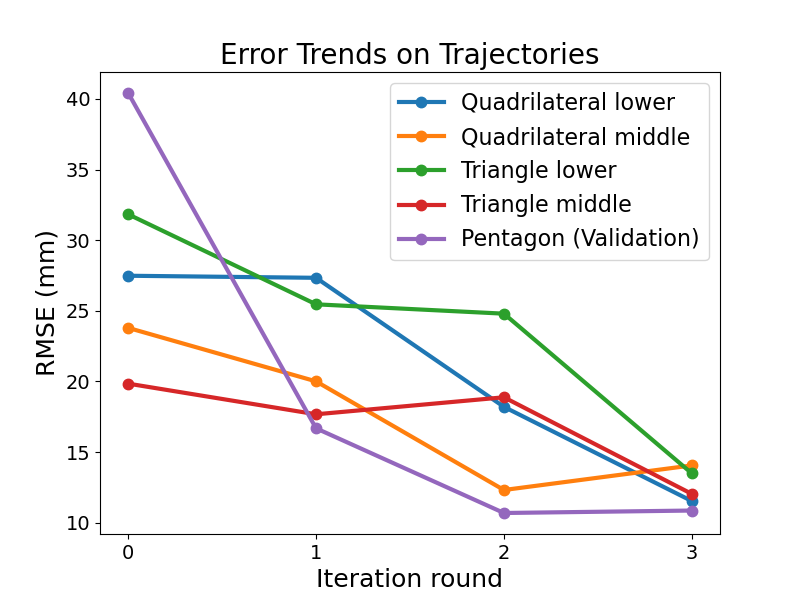

In [265]:
# plot the RMSEs
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111)
ax.plot([0, 1, 2, 3], RMSEs[0][0:4], marker='.', markersize=15, linewidth=3, label='Quadrilateral lower')
ax.plot([0, 1, 2, 3], RMSEs[1][0:4], marker='.', markersize=15, linewidth=3, label='Quadrilateral middle')
ax.plot([0, 1, 2, 3], RMSEs[2][0:4], marker='.', markersize=15, linewidth=3, label='Triangle lower')
ax.plot([0, 1, 2, 3], RMSEs[3][0:4], marker='.', markersize=15, linewidth=3, label='Triangle middle')
ax.plot([0, 1, 2, 3], RMSEs[4][0:4], marker='.', markersize=15, linewidth=3, label='Pentagon (Validation)')
ax.set_xlabel('Iteration round', fontsize=18)
ax.set_ylabel('RMSE (mm)', fontsize=18)
ax.set_title('Error Trends on Trajectories', fontsize=20)
ax.legend(fontsize=16)
ax.set_xticks([0, 1, 2, 3])
plt.tick_params(labelsize=14)
plt.show()

In [266]:
# calculate the pressure mean error per way
PressureError = []
for i in range(len(RealDataFinal)):
    pressure_error = []
    for j in range(len(RealDataFinal[i])):
        pressure_error.append(np.mean(np.abs(np.array(TargetDataFinal[i][j])[:, 0:2] - np.array(RealDataFinal[i][j])[:, 0:2])))
    PressureError.append(pressure_error)

# Print the resulting list of pressure errors as several rows
print("Pressure error per way:", np.mean(PressureError))


Pressure error per way: 0.3317917019251269


50D Foam

In [267]:
# read 50D data
RealData50D = []
TargetData50D = []
FINAL_MODEL = [['quadrilateral_lower_50Dround0', 'quadrilateral_lower_50Dround1', 'quadrilateral_lower_50Dround2', 'quadrilateral_lower_50Dround3'], ['triangle_lower_50Dround0', 'triangle_lower_50Dround1', 'triangle_lower_50Dround2', 'triangle_lower_50Dround3']]
num_epochs = 100

for i in range(2):
    # create an empty list to hold the sequences
    RealData = []
    TargetData = []

    for j in range(4):
        real_file = TEST_RESULT + '/' + D50_REAL_FILE[i][j] +'.csv'
        target_file = TARGET_CTRL_PRES + '/LSTM_' + FINAL_MODEL[i][j] +'_'+str(learning_rate)+'_'+str(hidden_size)+'_'+str(num_epochs)+'_'+str(num_layers)+'_' +str(dropout)+'.csv'

        # create an empty list to hold the sequences
        real_data = []
        target_data = []

        # read the CSV file and split it into sequences
        with open(real_file, newline='') as f:
            reader = csv.reader(f)
            for row in reader:
                if row[0] == '': # empty row indicates end of sequence
                    continue
                else:
                    # convert the row to a list of floats and append to the sequence
                    row_float = [float(x) for x in row]
                    real_data.append(row_float)

        with open(target_file, newline='') as f:
            reader = csv.reader(f)
            for row in reader:
                if row[0] == '':
                    continue
                else:
                    row_float = [float(x) for x in row]
                    target_data.append(row_float)

        # append the sequence to the list of all sequences
        RealData.append(real_data)
        TargetData.append(target_data)

    RealData50D.append(RealData)
    TargetData50D.append(TargetData)

# print('real data size:', len(RealData50D), 'x', len(RealData50D[0]), 'x', len(RealData50D[0][0]), 'x', len(RealData50D[0][0][0]))
# print('target data size:', len(TargetData50D), 'x', len(TargetData50D[0]), 'x', len(TargetData50D[0][0]), 'x', len(TargetData50D[0][0][0]))


In [268]:
# calculate the RMSEs
RMSEs = []

for i in range(len(RealData50D)):
    rmses = []
    for j in range(len(RealData50D[i])):
        rmse = 0
        for k in range(len(RealData50D[i][j])):
            rmse += (np.linalg.norm(np.array(TargetData50D[i][j][k][3:6]) - np.array(RealData50D[i][j][k][3:6])))**2
        rmse /= len(TargetData50D[i][j])
        rmse = np.sqrt(rmse)
        rmses.append(rmse)
    RMSEs.append(rmses)

# Print the RMSEs matrix as several rows
print('RMSEs:')
for row in RMSEs:
    print(row)

RMSEs:
[33.405715702494696, 23.880607025824727, 21.03833326943153, 17.472735195829955]
[38.560543048311295, 23.429936911117224, 23.03300973075709, 15.26144106618909]


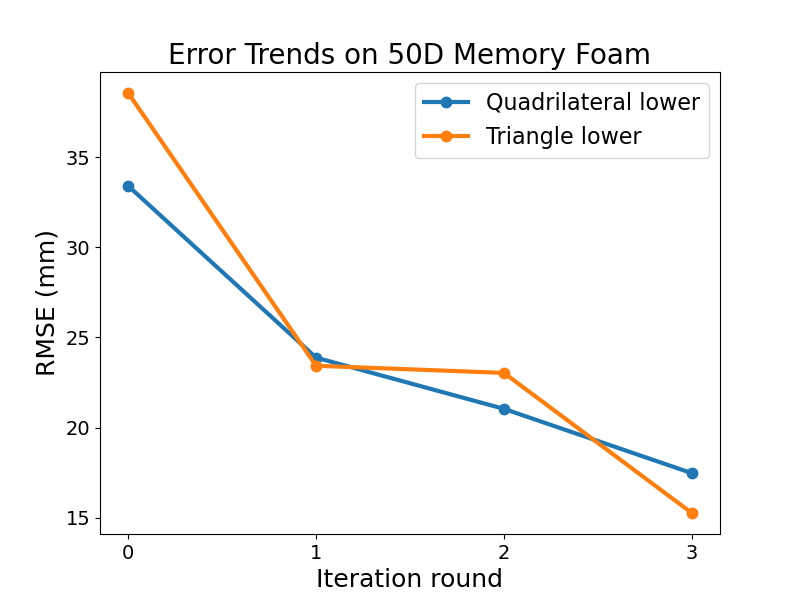

In [269]:
# plot the RMSEs
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111)
ax.plot([0, 1, 2, 3], RMSEs[0][0:4], marker='.', markersize=15, linewidth=3, label='Quadrilateral lower')
ax.plot([0, 1, 2, 3], RMSEs[1][0:4], marker='.', markersize=15, linewidth=3, label='Triangle lower')
ax.set_xlabel('Iteration round', fontsize=18)
ax.set_ylabel('RMSE (mm)', fontsize=18)
ax.set_title('Error Trends on 50D Memory Foam', fontsize=20)
ax.legend(fontsize=16)
ax.set_xticks([0, 1, 2, 3])
plt.tick_params(labelsize=14)
plt.show()


Final Reverse Results

In [270]:
# read final reverse data
RealDataFinalReverse = []
TargetDataFinalReverse = []
FINAL_REVERSE_MODEL = [['quadrilateral_lower_reverse_round0', 'quadrilateral_lower_reverse_round1', 'quadrilateral_lower_reverse_round2', 'quadrilateral_lower_reverse_round3'], ['quadrilateral_middle_reverse_round0', 'quadrilateral_middle_reverse_round1', 'quadrilateral_middle_reverse_round2', 'quadrilateral_middle_reverse_round3'], ['triangle_lower_reverse_round0', 'triangle_lower_reverse_round1', 'triangle_lower_reverse_round2', 'triangle_lower_reverse_round3'], ['triangle_middle_reverse_round0', 'triangle_middle_reverse_round1', 'triangle_middle_reverse_round2', 'triangle_middle_reverse_round3']]
num_epochs = 200

for i in range(4):
    # create an empty list to hold the sequences
    RealData = []
    TargetData = []

    for j in range(4):
        real_file = TEST_RESULT + '/' + FINAL_REVERSE_REAL_FILE[i][j] +'.csv'
        target_file = TARGET_CTRL_PRES + '/LSTM_' + FINAL_REVERSE_MODEL[i][j] +'_'+str(learning_rate)+'_'+str(hidden_size)+'_'+str(num_epochs)+'_'+str(num_layers)+'_' +str(dropout)+'.csv'

        # create an empty list to hold the sequences
        real_data = []
        target_data = []

        # read the CSV file and split it into sequences
        with open(real_file, newline='') as f:
            reader = csv.reader(f)
            for row in reader:
                if row[0] == '':  # empty row indicates end of sequence
                    continue
                else:
                    # convert the row to a list of floats and append to the sequence
                    row_float = [float(x) for x in row]
                    real_data.append(row_float)

        with open(target_file, newline='') as f:
            reader = csv.reader(f)
            for row in reader:
                if row[0] == '':  # empty row indicates end of sequence
                    continue
                else:
                    # convert the row to a list of floats and append to the sequence
                    row_float = [float(x) for x in row]
                    target_data.append(row_float) 

        # append the sequence to the list of all sequences
        RealData.append(real_data)
        TargetData.append(target_data)

    RealDataFinalReverse.append(RealData)
    TargetDataFinalReverse.append(TargetData)


In [271]:
# calculate the RMSEs
RMSEs = []
for i in range(len(RealDataFinalReverse)):
    rmses = []
    # print('i:', i)
    for j in range(len(RealDataFinalReverse[i])):
        rmse = 0
        # print('j:', j)
        for k in range(len(RealDataFinalReverse[i][j])):
            rmse += (np.linalg.norm(np.array(TargetDataFinalReverse[i][j][k][3:6]) - np.array(RealDataFinalReverse[i][j][k][3:6])))**2
        rmse /= len(TargetDataFinalReverse[i][j])
        rmse = np.sqrt(rmse)
        rmses.append(rmse)
    RMSEs.append(rmses)

# Print the RMSEs matrix as several rows
print('RMSEs:')
for row in RMSEs:
    print(row)

RMSEs:
[29.255800465296872, 31.503656192136905, 41.25856237711581, 9.866767869910612]
[29.560946150391775, 27.751920979076857, 16.938274172510464, 12.07559505393739]
[46.213879075921554, 35.509649000590265, 33.8988140985675, 13.485452530926686]
[27.228590533584075, 22.212147871087268, 23.402510308670205, 11.230781087982132]


In [272]:
# Define the radius value
radius = 160

# Calculate the relative error of the trajectory tracking for each row of the RMSEs list
relative_error = []
for row in RMSEs:
    row_error = [RMSE/radius for RMSE in row]
    relative_error.append(row_error)

# Print the resulting list of relative errors as several rows
print("Relative error of the trajectory tracking for each row of the RMSEs list:")
for row in relative_error:
    print(row)

Relative error of the trajectory tracking for each row of the RMSEs list:
[0.18284875290810546, 0.19689785120085565, 0.2578660148569738, 0.061667299186941325]
[0.1847559134399486, 0.17344950611923035, 0.1058642135781904, 0.07547246908710868]
[0.2888367442245097, 0.22193530625368915, 0.21186758811604686, 0.0842840783182918]
[0.17017869083490048, 0.13882592419429543, 0.14626568942918877, 0.07019238179988832]


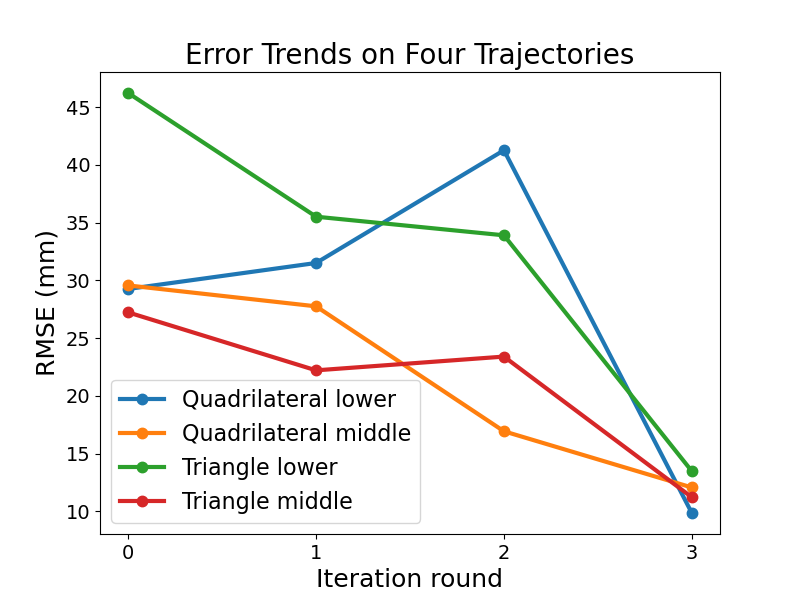

In [273]:
# plot the RMSEs
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111)
ax.plot([0, 1, 2, 3], RMSEs[0][0:4], marker='.', markersize=15, linewidth=3, label='Quadrilateral lower')
ax.plot([0, 1, 2, 3], RMSEs[1][0:4], marker='.', markersize=15, linewidth=3, label='Quadrilateral middle')
ax.plot([0, 1, 2, 3], RMSEs[2][0:4], marker='.', markersize=15, linewidth=3, label='Triangle lower')
ax.plot([0, 1, 2, 3], RMSEs[3][0:4], marker='.', markersize=15, linewidth=3, label='Triangle middle')
ax.set_xlabel('Iteration round', fontsize=18)
ax.set_ylabel('RMSE (mm)', fontsize=18)
ax.set_title('Error Trends on Four Trajectories', fontsize=20)
ax.legend(fontsize=16)
ax.set_xticks([0, 1, 2, 3])
plt.tick_params(labelsize=14)
plt.show()


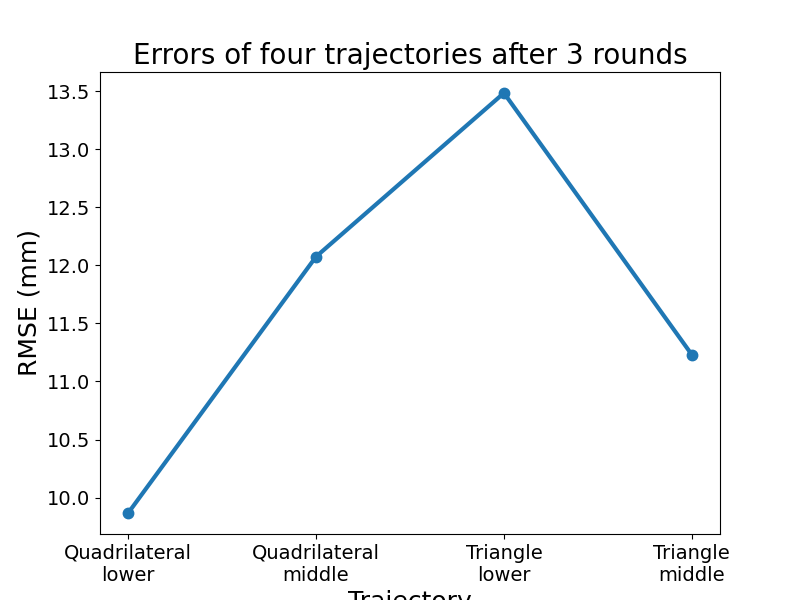

In [274]:
fig = plt.figure(figsize=(8, 6))

# Define the values array
x = ["Quadrilateral\nlower", "Quadrilateral\nmiddle", "Triangle\nlower", "Triangle\nmiddle"]

ax = fig.add_subplot(111)
ax.plot(x, np.array(RMSEs)[:, 3], marker='.', markersize=15, linewidth=3)
ax.set_title("Errors of four trajectories after 3 rounds", fontsize=20)
ax.set_xlabel("Trajectory", fontsize=18)
ax.set_ylabel("RMSE (mm)", fontsize=18)
plt.tick_params(labelsize=14)

# Show the plot
plt.show()

# save the figure
fig.savefig('error_trends.png', dpi=300, bbox_inches='tight')